- Author：kuhung （https://github.com/kuhung）
- Create time：2017/5/11

In [2]:
import pandas as pd
%matplotlib inline

In [3]:
train = pd.read_csv('../dataset/pre/train.csv')
test = pd.read_csv('../dataset/pre/test.csv')

train['source']= 'train'
test['source'] = 'test'
data=pd.concat([train, test],ignore_index=True)
data.shape

(4088017, 10)

In [4]:
train['clickTime'].max(),train['clickTime'].min()

(302359, 170000)

### 对感兴趣的特征进行观察

- 查看训练集日转化量

In [81]:
train['clickDate'] = train['clickTime'].apply(lambda x : x/10000)

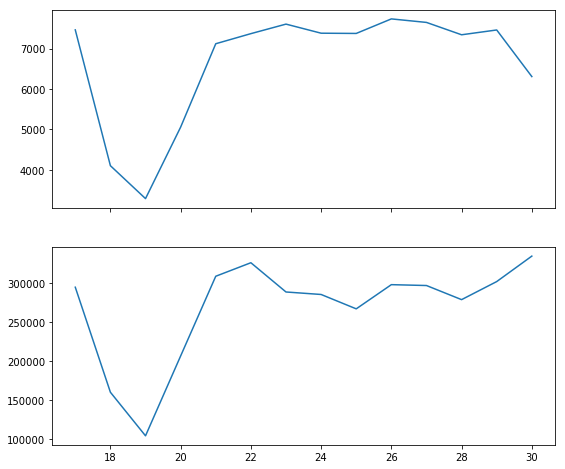

In [82]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(2, sharex=True, figsize = [9,8])
axarr[0].plot(train.groupby(['clickDate'])['label'].sum())   # 点击数
axarr[1].plot(train.groupby(['clickDate'])['creativeID'].count()) # 展示数

plt.show()

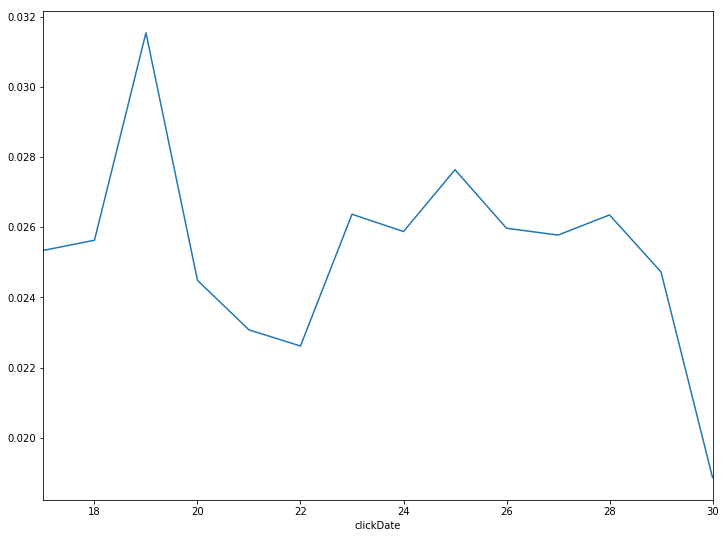

In [84]:
(train.groupby(['clickDate'])['label'].sum()/train.groupby(['clickDate'])['creativeID'].count()).plot(figsize = [12,9])

- 观察：
 1. 18\19\20的数据存在异常，使用时应慎重/ 后期注意排查
 2. 30号的数据出现滑坡，推测可能是部分样本未得到统计。不建议把30号的数据作为训练或验证集。
 3. 点击转化率与点击数刚好相反，出乎意料。

- 结论
 1. 即：目前可用的数据为 21-29 九天数据。

### 查看总数据的用户数目以及广告数目


In [7]:
data.shape[0]

4088017

In [8]:
len(data['userID'].unique()),len(data['creativeID'].unique())

(2805118, 6582)

In [9]:
len(train['userID'].unique()),len(train['creativeID'].unique()),len(test['userID'].unique()),len(test['creativeID'].unique())

(2595627, 6315, 297466, 2173)

In [10]:
print '\n同一用户出现的平均次数:'
print float(data.shape[0])/len(data['userID'].unique())   

print '\n同一广告曝光的平均次数:'
print float(data.shape[0])/len(data['creativeID'].unique())

print '\n同一广告曝光在同一用户的平均次数:'
print float(len(data['userID'].unique()))   /len(data['creativeID'].unique())

print '\n训练集中同一广告曝光在同一用户的平均次数:'
print float(len(train['userID'].unique()))   /len(train['creativeID'].unique())

print '\n测试集中同一广告曝光在同一用户的平均次数:'
print float(len(test['userID'].unique()))   /len(test['creativeID'].unique())


同一用户出现的平均次数:
1.45734225797

同一广告曝光的平均次数:
621.090398055

同一广告曝光在同一用户的平均次数:
426.180188393

训练集中同一广告曝光在同一用户的平均次数:
411.025653207

测试集中同一广告曝光在同一用户的平均次数:
136.891854579


- 结论：

  1、平均而言，每个用户出现了1.5次，较理想。
  
  2、训练集和测试集中的样本曝光次数不同，测试集明显稀疏于训练集。
  
  3、即：测试集的稀疏性带来的影响待观察

### 训练集和测试集的样本分布

In [13]:
print data['userID'].value_counts().head()
print '\n'

print train['userID'].value_counts().head()
print '\n'

print test['userID'].value_counts().head()
print '\n'

print data[data.label == 1]['userID'].value_counts().head()

1884671    113
865369     101
2177410     98
674047      86
2453862     79
Name: userID, dtype: int64


1884671    113
865369     101
2177410     98
674047      86
2453862     79
Name: userID, dtype: int64


2299240    16
2651201    13
1132996    12
302211     12
1971662    12
Name: userID, dtype: int64


2676800    11
1511544     7
979819      6
201873      6
1027751     6
Name: userID, dtype: int64


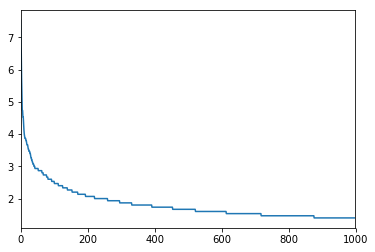

In [50]:
(data['userID'].value_counts()/15).head(1000).plot(use_index= False)

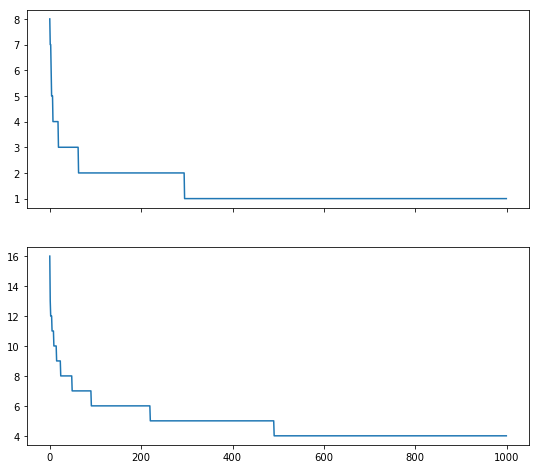

In [53]:
import matplotlib.pyplot as plt

count = 1000
x1 = [x for x in range(count)]
y1 = train['userID'].value_counts().head(count).values/14 # 训练集14天，计算14天的平均值

x2 = [x for x in range(count)]
y2 = test['userID'].value_counts().head(count).values

f, axarr = plt.subplots(2, sharex=True, figsize = [9,8])
axarr[0].plot(x1, y1)
axarr[1].plot(x2, y2)

plt.show()

- 观察：

   1、训练集中，用户出现的总次数明显高于测试集，但平均而言，少于测试集用户出现的频率。

#### 训练集测试集分布

In [65]:
data[data.label == 1]['userID'].value_counts().head(30),train[train.label == 1]['userID'].value_counts().head(30)

(2676800    11
 1511544     7
 979819      6
 201873      6
 1027751     6
 171368      5
 1950566     4
 993120      4
 907063      4
 438307      4
 1184533     4
 1483605     4
 1138040     4
 1432913     4
 2699021     4
 12619       3
 1234709     3
 387156      3
 1268780     3
 222005      3
 1177344     3
 2336594     3
 1660670     3
 1582576     3
 329251      3
 2625286     3
 642781      3
 1522684     3
 1911397     3
 2569662     3
 Name: userID, dtype: int64, 2676800    11
 1511544     7
 979819      6
 201873      6
 1027751     6
 171368      5
 1950566     4
 993120      4
 907063      4
 438307      4
 1184533     4
 1483605     4
 1138040     4
 1432913     4
 2699021     4
 12619       3
 1234709     3
 387156      3
 1268780     3
 222005      3
 1177344     3
 2336594     3
 1660670     3
 1582576     3
 329251      3
 2625286     3
 642781      3
 1522684     3
 1911397     3
 2569662     3
 Name: userID, dtype: int64)

In [63]:
train[train.label == 1]['userID'].value_counts().head(30)

2676800    11
1511544     7
979819      6
201873      6
1027751     6
171368      5
1950566     4
993120      4
907063      4
438307      4
1184533     4
1483605     4
1138040     4
1432913     4
2699021     4
12619       3
1234709     3
387156      3
1268780     3
222005      3
1177344     3
2336594     3
1660670     3
1582576     3
329251      3
2625286     3
642781      3
1522684     3
1911397     3
2569662     3
Name: userID, dtype: int64

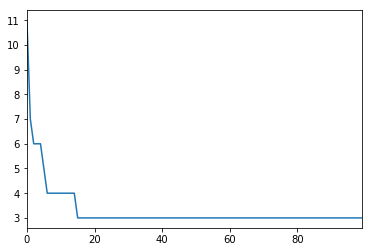

In [55]:
data[data.label == 1]['userID'].value_counts().head(100).plot(use_index= False)

In [32]:
# 高转化率用户
data[(data.userID == 2569662)]

,clickTime,connectionType,conversionTime,creativeID,instanceID,label,positionID,source,telecomsOperator,userID
572207,200704,2,NaN,5312,NaN,0,675,train,1,2569662
725993,201931,2,201934.0,3341,NaN,1,3322,train,1,2569662
1697485,240125,1,240129.0,1281,NaN,1,3322,train,2,2569662
2565746,270625,1,NaN,1882,NaN,0,675,train,2,2569662
2565751,270626,1,270717.0,1882,NaN,1,675,train,2,2569662
2916545,281117,2,NaN,3391,NaN,0,5726,train,1,2569662
